# 5300 Final 1. Double Pendulum


$\mathcal{L} = T - U$. 

$\begin{align}
\mathcal{L} = \frac12 (m_1 + m_2) L_1^2 \dot\phi_1^2 + m_2 L_1 L_2 \dot\phi_1 \dot\phi_2 \cos(\phi_1 - \phi_2) + \frac12 m_2 L_2^2 \dot\phi_2^2 - (m_1 + m_2) g L_1 (1 - \cos\phi_1) - m_2 g L_2 (1 - \cos\phi_2)
\end{align}$

$\begin{align}
\frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi} = \frac{\partial\mathcal L}{\partial\phi}.
\end{align}$

$\begin{align}
  \ddot \phi_1 = (m_2 g \sin\phi_2 \cos(\phi_1 - \phi_2) - m_2 \sin(\phi_1 - \phi_2) (L_1 \dot\phi_1^2 \cos(\phi_1 - \phi_2) + L_2 \dot\phi_2^2) - (m_1 + m_2) g \sin\phi_1) \div (L_1 (m_1 + m_2 {\sin}^2(\phi_1 - \phi_2)))
\end{align}$

$\begin{align}
  \ddot\phi_2 = ((m_1 + m_2) (L_1 \dot\phi_1^2 \sin(\phi_1 - \phi_2) - g \sin\phi_2 + g \sin\phi_1 \cos(\phi_1 - \phi_2)) \\
 + m_2 L_2 \dot\phi_2^2 \sin(\phi_1 - \phi_2) \cos(\phi_1 - \phi_2)) \div (L_2 (m_1 + m_2 {\sin}^2(\phi_1 - \phi_2)))
\end{align}$


In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [3]:
font_size = 14
plt.rcParams.update({'font.size': font_size})

## Pendulum code

In [4]:
class LagrangianPendulum():
   
    def __init__(self, L1=1., L2=1., m1=1., m2=1., g=1.):
        # Initialize the class with given parameters
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = m1
        self.m2 = m2
    
    def dy_dt(self, t, y):
        """
        Returns right-hand side of the diffeq in vector y, given time t and y value: 
        [phi, dphi/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 2-component vector with y[0] = phi(t) and y[1] = dphi/dt
            
        Returns
        -------
        A 2-component vector containing the derivative of [phi, dphi/dt]
        """
        c = np.cos(y[0] - y[2])
        s = np.sin(y[0] - y[2])
        M = self.m1 + self.m2
        # Returns dphi/dt and d^2phi/dt^2 according to Lagrange's equation
        return [
            y[1],
            (self.m2 * self.g * np.sin(y[2]) * c - self.m2 * s * (self.L1 * y[1] ** 2 * c +
             self.L2 * y[3] ** 2) - M * self.g * np.sin(y[0])) / self.L1 / (self.m1 + self.m2 * s ** 2),
            y[3],
            (M * (self.L1 * y[1] ** 2 * s - self.g * np.sin(y[2]) + self.g * np.sin(y[0]) * c) +
             self.m2 * self.L2 * y[3] ** 2 * s * c) / self.L2 / (self.m1 + self.m2 * s ** 2)
            ]

    
    def solve_ode(self, t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0, abserr=1.0e-9, relerr=1.0e-9):
        """
        Solves the ODE given initial conditions phi_0 and phi_dot_0.
        """
        # Sets the initial conditions as a 2-component vector
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0] 
        # Solves the ODE using solve_ivp from scipy.integrate
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), y, t_eval=t_pts, atol=abserr, rtol=relerr)
        # Extracts the solutions for phi and dphi/dt from the solution object
        phi1, phi1_dot, phi2, phi2_dot = solution.y

        return phi1, phi1_dot, phi2, phi2_dot

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    """
    Returns the start and stop indices of a numpy array given start and stop values.

    Args:
    t_pts: A numpy array containing the time values.
    plot_start: The start value of the plot.
    plot_stop: The stop value of the plot.

    Returns:
    A tuple containing the start and stop indices of the numpy array.
    """
    # Get the index of the element in t_pts closest to plot_start
    start_index = (np.fabs(t_pts-plot_start)).argmin()
    
    # Get the index of the element in t_pts closest to plot_stop
    stop_index = (np.fabs(t_pts-plot_stop)).argmin() 
    
    return start_index, stop_index


## Pendulum Plots

In [6]:
# Define the start and end times and time step
t_start = 0.0
t_end = 30.0
delta_t = 0.001

# Create an array of time points from t_start to t_end with spacing delta_t
t_pts = np.arange(t_start, t_end + delta_t, delta_t)

# Define the parameters for the Lagrangian pendulum
L1 = 1.0
L2 = 1.0
g = 1.0
m1 = 1.0
m2 = 1.0

# Create an instance of the LagrangianPendulum class with the given parameters
p = LagrangianPendulum(L1=L1, L2=L2, g=g, m1=m1, m2=m2)


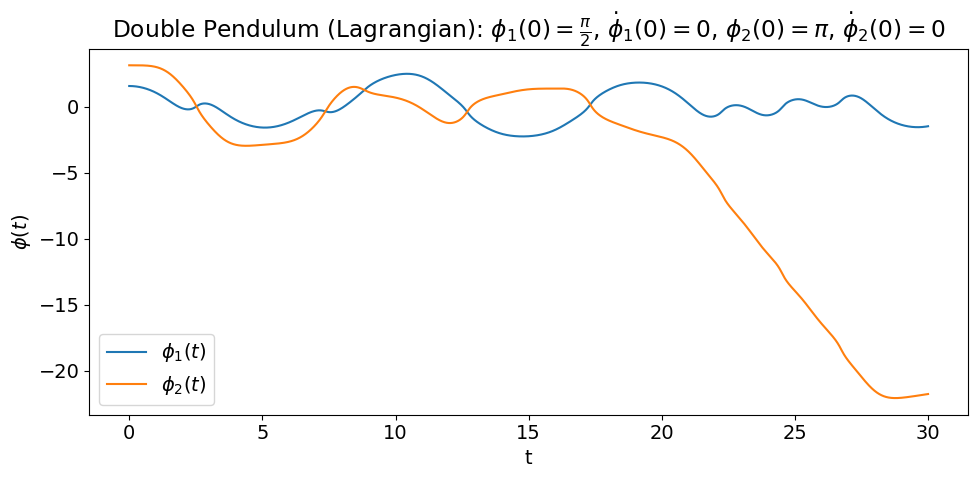

In [7]:
# Set initial values for the double pendulum angles and angular velocities
phi1_0 = (1.0/2.0)*np.pi
phi1_dot_0 = 0.0
phi2_0 = np.pi
phi2_dot_0 = 0.0

# Solve the ODE for the double pendulum using the initial values and time points
phi1, phi1_dot, phi2, phi2_dot = p.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)

# Create a figure for the double pendulum plot
fig = plt.figure(figsize=(10,5))

# Add a subplot for the double pendulum plot
ax = fig.add_subplot(1,1,1)

# Get the indices of the time points to be plotted
start, stop = start_stop_indices(t_pts, t_start, t_end)

# Plot the double pendulum angles as a function of time
ax.plot(t_pts[start : stop], phi1[start : stop], label=r'$\phi_1(t)$')
ax.plot(t_pts[start : stop], phi2[start : stop], label=r'$\phi_2(t)$')

# Add labels and a title to the double pendulum plot
ax.set_xlabel('t')
ax.set_ylabel(r'$\phi(t)$')
ax.set_title('Double Pendulum (Lagrangian): ' r'$\phi_1(0) = \frac{\pi}{2}$' \
             ', ' r'$\dot\phi_1(0) = 0$' ', ' r'$\phi_2(0) = \pi$' ', ' \
             r'$\dot\phi_2(0) = 0$')

# Add a legend to the double pendulum plot
ax.legend()

# Adjust the figure layout
fig.tight_layout()


## Chaos

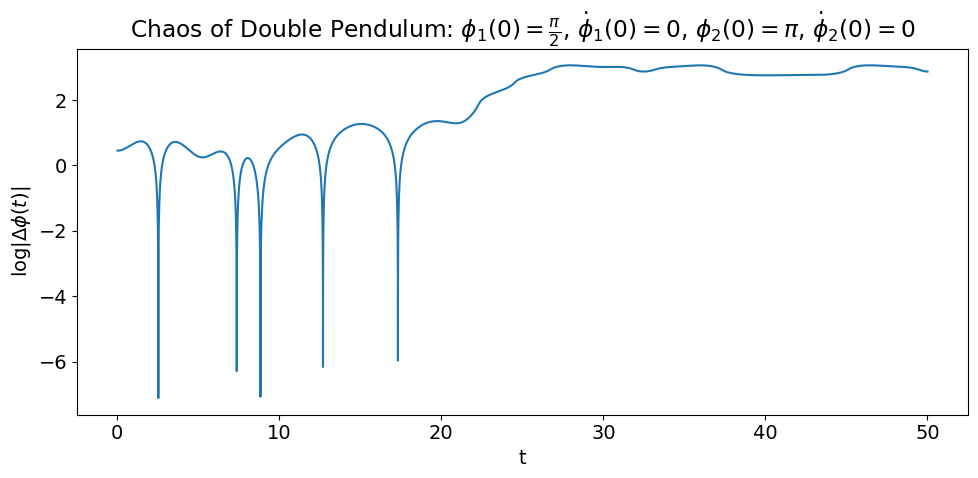

In [10]:
# set up time array from t_start to 100 with time step delta_t
t_pts2 = np.arange(t_start, 100+delta_t, delta_t)

# solve the double pendulum ODE using initial conditions phi1_0, phi1_dot_0, phi2_0, phi2_dot_0
chaos = p.solve_ode(t_pts2, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)

# create a new figure with size 10x5
fig2 = plt.figure(figsize=(10,5))

# create a new subplot in the figure
ax2 = fig2.add_subplot(1,1,1)

# plot the logarithm of the absolute difference between phi1 and phi2 as a function of time t
ax2.plot(t_pts2, np.log(np.abs(chaos[2] - chaos[0])), label=r'$\phi_1(t)$')

# set x-axis label
ax2.set_xlabel('t')

# set y-axis label
ax2.set_ylabel(r'$\log|\Delta\phi(t)|$')

# set the title of the plot
ax2.set_title('Chaos of Double Pendulum: ' r'$\phi_1(0) = \frac{\pi}{2}$' \
             ', ' r'$\dot\phi_1(0) = 0$' ', ' r'$\phi_2(0) = \pi$' ', ' \
             r'$\dot\phi_2(0) = 0$')

# adjust the spacing of the subplots so that there is no overlap between them
fig2.tight_layout()


The logarithm of the absolute value of the difference, denoted by $\log|\Delta\phi(t)|$, shows a linear increase over time (
t=0 to t=30). This indicates that the system is chaotic during this time range.